# Spotify 이거저거 EDA

# 1. Data Collection
- spotify API
- [spotify for developers](https://developer.spotify.com/)
- selenium
- requests
- beautifulsoup

- kaggle에 다양한 데이터셋이 많이 올라와져있기에 매일 업데이트 되는 데이터 선택.
    - [Top Spotify Songs in 73 Countries (Daily Updated)](https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated)


In [2]:
import pandas as pd
df = pd.read_csv('data/universal_top_spotify_songs.csv')
df

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7gaA3wERFkFkgivjwbSvkG,"yes, and?",Ariana Grande,1,0,49,NaN,2024-01-16,89,True,...,1,-6.513,1,0.0505,0.1980,0.000085,0.104,0.823,119.008,4
1,0R6NfOiLzLj4O5VbYSJAjf,La Diabla,Xavi,2,0,-1,NaN,2024-01-16,97,False,...,11,-4.372,0,0.0409,0.2550,0.000000,0.236,0.697,131.842,3
2,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,3,0,-1,NaN,2024-01-16,100,True,...,6,-3.180,0,0.0319,0.2560,0.000000,0.114,0.844,111.018,1
3,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,Mitski,4,3,1,NaN,2024-01-16,98,False,...,9,-14.958,1,0.0321,0.8680,0.135000,0.158,0.121,113.950,4
4,7CyPwkp0oE8Ro9Dd5CUDjW,"One Of The Girls (with JENNIE, Lily Rose Depp)","The Weeknd, JENNIE, Lily-Rose Depp",5,1,1,NaN,2024-01-16,97,False,...,8,-6.287,1,0.0318,0.0545,0.000000,0.162,0.202,87.510,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331611,0AYt6NMyyLd0rLuvr0UkMH,Slime You Out (feat. SZA),"Drake, SZA",46,4,0,AE,2023-10-18,84,True,...,5,-9.243,0,0.0502,0.5080,0.000000,0.259,0.105,88.880,3
331612,2Gk6fi0dqt91NKvlzGsmm7,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47,3,0,AE,2023-10-18,80,True,...,10,-5.060,1,0.0452,0.0585,0.000000,0.132,0.476,121.879,4
331613,26b3oVLrRUaaybJulow9kz,People,Libianca,48,2,0,AE,2023-10-18,88,False,...,10,-7.621,0,0.0678,0.5510,0.000013,0.102,0.693,124.357,5
331614,5ydjxBSUIDn26MFzU3asP4,Rainy Days,V,49,1,0,AE,2023-10-18,88,False,...,9,-8.016,0,0.0875,0.7390,0.000000,0.148,0.282,74.828,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331616 entries, 0 to 331615
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          331616 non-null  object 
 1   name                331594 non-null  object 
 2   artists             331594 non-null  object 
 3   daily_rank          331616 non-null  int64  
 4   daily_movement      331616 non-null  int64  
 5   weekly_movement     331616 non-null  int64  
 6   country             327110 non-null  object 
 7   snapshot_date       331616 non-null  object 
 8   popularity          331616 non-null  int64  
 9   is_explicit         331616 non-null  bool   
 10  duration_ms         331616 non-null  int64  
 11  album_name          331430 non-null  object 
 12  album_release_date  331430 non-null  object 
 13  danceability        331616 non-null  float64
 14  energy              331616 non-null  float64
 15  key                 331616 non-nul

In [8]:
# 데이터 사이즈 확인
df.shape

(331616, 25)

## 약간의 전처리

In [5]:
data = df.drop('spotify_id', axis=1)
data.head()

,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"yes, and?",Ariana Grande,1,0,49,NaN,2024-01-16,89,True,214994,...,1,-6.513,1,0.0505,0.1980,0.000085,0.104,0.823,119.008,4
1,La Diabla,Xavi,2,0,-1,NaN,2024-01-16,97,False,172264,...,11,-4.372,0,0.0409,0.2550,0.000000,0.236,0.697,131.842,3
2,greedy,Tate McRae,3,0,-1,NaN,2024-01-16,100,True,131872,...,6,-3.180,0,0.0319,0.2560,0.000000,0.114,0.844,111.018,1
3,My Love Mine All Mine,Mitski,4,3,1,NaN,2024-01-16,98,False,137773,...,9,-14.958,1,0.0321,0.8680,0.135000,0.158,0.121,113.950,4
4,"One Of The Girls (with JENNIE, Lily Rose Depp)","The Weeknd, JENNIE, Lily-Rose Depp",5,1,1,NaN,2024-01-16,97,False,244684,...,8,-6.287,1,0.0318,0.0545,0.000000,0.162,0.202,87.510,4


In [10]:
# null 값 확인
pd.isnull(data).sum()

name                    22
artists                 22
daily_rank               0
daily_movement           0
weekly_movement          0
country               4506
snapshot_date            0
popularity               0
is_explicit              0
duration_ms              0
album_name             186
album_release_date     186
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64

In [6]:
# 곡 제목과 아티스트 정보가 없는 22개의 열 제거
# country 비어 있는 값은 unknown 채워주기
data['country'].fillna('unknown', inplace=True)
data.dropna(subset=['name', 'artists'], inplace=True)

In [13]:
data.shape

(331594, 24)

## 1. popularity와 daily_rank
필요한 라이브러리 import

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
rows_with_rank1_popularity0 = data[(data['daily_rank'] == 1) & (data['popularity'] == 0)]
rows_with_rank1_popularity0

print(len(data[(data['daily_rank'] == 1) & (data['popularity'] == 0)]))

67


- 67개의 노래가 popularity 0임에도 daily_rank 1을 찍었다.

## Popularity
데이터 값들 중 가장 흥미로웠던 값. 

- spotify는 다른 노래들과 비교하여 현재 곡의 인기를 추적한다
- 0 ~ 100 사이의 값
- popularity 값이 높을수록 곡의 노출도 또한 커진다.

- 얼마나(횟수) 노래가 재생되는지
- 그리고 언제 재생되는지(최근에 재생되었는지, 아니면 마지막 재생이 작년이었는지 따진다는 말)

- 2~30을 넘어가면 눈에 띈다고 한다

**중요한 이유**
- 내 음악이 얼마나 많이 재생되는지 X
- spotify 플랫폼 내에서 평가되는 곡의 가치
    - 높게 평가 된다? -> spotify의 플레이리스트에 추가 -> stream 최근 횟수 늘어난다 -> 대중에게 노출 -> 새로운 팬 생성

popularity = 100
- 너도나도 다 듣는 음악
- 새로운 리스너가 유입될 확률이 높다

popularity = 0
- 매번 듣는 사람만 듣는 음악
- 새로운 리스너가 유입될 확률이 낮다

In [19]:
# popularity 값 별로 몇 개의 곡이 있는지 카운트
pop0 = data[data['popularity'] == 0].shape[0]
pop25 = data[(data['popularity'] > 0) & (data['popularity'] <= 25)].shape[0]
pop50 = data[(data['popularity'] > 25) & (data['popularity'] <= 50)].shape[0]
pop75 = data[(data['popularity'] > 50) & (data['popularity'] <= 75)].shape[0]
pop99 = data[(data['popularity'] > 75) & (data['popularity'] <= 99)].shape[0]
pop100 = data[data['popularity'] == 100].shape[0]

# data shape과 일치
print(data.shape[0] == pop0 + pop25 + pop50 + pop75 + pop99 + pop100)  

True


In [20]:
# popularity 구간별 rank1위 카운트
pop0_1 = data[(data['popularity'] == 0) & (data['daily_rank'] == 1)].shape[0]
pop25_1 = data[(data['popularity'] > 0) & (data['popularity'] <= 25) & (data['daily_rank'] == 1)].shape[0]
pop50_1 = data[(data['popularity'] > 25) & (data['popularity'] <= 50) & (data['daily_rank'] == 1)].shape[0]
pop75_1 = data[(data['popularity'] > 50) & (data['popularity'] <= 75) & (data['daily_rank'] == 1)].shape[0]
pop99_1 = data[(data['popularity'] > 75) & (data['popularity'] <= 99) & (data['daily_rank'] == 1)].shape[0]
pop100_1 = data[(data['popularity'] == 100) & (data['daily_rank'] == 1)].shape[0]

In [21]:
popularity_counts_dict = {
    'Popularity Range': ['Popularity 0', 'Popularity <= 25', 'Popularity <= 50', 
                         'Popularity <= 75', 'Popularity <= 99', 'Popularity 100'],
    'Count': [pop0, pop25, pop50, pop75, pop99, pop100]
}

# 위의 데이터 사용해 df 만들기
popularity_df = pd.DataFrame(popularity_counts_dict)

popularity_df['Rank 1'] = [pop0_1, pop25_1, pop50_1, pop75_1, pop99_1, pop100_1]

popularity_df['ratio'] = [pop0_1/pop0 * 100, pop25_1/pop25 * 100, pop50_1/pop50 * 100, pop75_1/pop75 * 100, pop99_1/pop99 * 100, pop100_1/pop100 * 100]
popularity_df['sum'] = np.sum(popularity_df.ratio)
popularity_df['pct'] = popularity_df['ratio'] / popularity_df['sum']
popularity_df

,Popularity Range,Count,Rank 1,ratio,sum,pct
0,Popularity 0,2030,67,3.300493,16.870472,0.195637
1,Popularity <= 25,1001,29,2.897103,16.870472,0.171726
2,Popularity <= 50,13352,218,1.632714,16.870472,0.096779
3,Popularity <= 75,108325,1911,1.764136,16.870472,0.104569
4,Popularity <= 99,203953,4270,2.093620,16.870472,0.124100
5,Popularity 100,2933,152,5.182407,16.870472,0.307188


## 딱히 연관성이 없나...?

#### 의문점 1. popularity=0이 비교적 1위를 찍은 횟수는 왜 많을까?
(비율로 따지자면 popularity 더 높은 구간들보다 1위로 전환된 횟수가 더 높다.)
1. count 자체가 적어서(2030 vs 1만 ~ 20만)
2. popularity=0의 의미는 맨날 든는 사람만 듣는다. 이미 코어팬층이 형성 되어 있다는 뜻.
    - 팬들이 합심해서 잠시 1위 찍게 하는 게 가능할지도?
3. 반대로 popularity가 적당히 높은 곡들은 그만큼 대중성은 있지만 그 노래에 2번 사람들만큼은 빠지지 않는다는 뜻.

#### 의문점 2. 그런데 popularity 100이어도 daily_rank 1을 찍은 5%...?
- 말이 앞뒤가 안맞는다
- 1위 노래라는 건 보통 특정 기간동안 가장 많은 사랑을 받은 노래
- 근데 왜 5% 밖에 안 될까?

In [22]:
data[(data['popularity'] == 0) & (data['daily_rank'] == 1)]

,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
7291,"yes, and?",Ariana Grande,1,49,49,unknown,2024-01-14,0,True,214994,...,1,-6.513,1,0.0505,0.198000,0.000085,0.1040,0.823,119.008,4
7541,"yes, and?",Ariana Grande,1,49,49,US,2024-01-14,0,True,214994,...,1,-6.513,1,0.0505,0.198000,0.000085,0.1040,0.823,119.008,4
7891,"yes, and?",Ariana Grande,1,49,49,SG,2024-01-14,0,True,214994,...,1,-6.513,1,0.0505,0.198000,0.000085,0.1040,0.823,119.008,4
7991,"yes, and?",Ariana Grande,1,49,49,SA,2024-01-14,0,True,214994,...,1,-6.513,1,0.0505,0.198000,0.000085,0.1040,0.823,119.008,4
8541,"yes, and?",Ariana Grande,1,49,49,NL,2024-01-14,0,True,214994,...,1,-6.513,1,0.0505,0.198000,0.000085,0.1040,0.823,119.008,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290194,"""Slut!"" (Taylor's Version) (From The Vault)",Taylor Swift,1,49,49,GB,2023-10-29,0,False,180381,...,7,-13.178,1,0.0550,0.345000,0.000076,0.0603,0.306,77.983,4
290944,"""Slut!"" (Taylor's Version) (From The Vault)",Taylor Swift,1,49,49,CA,2023-10-29,0,False,180381,...,7,-13.178,1,0.0550,0.345000,0.000076,0.0603,0.306,77.983,4
291244,Style (Taylor's Version),Taylor Swift,1,49,49,AU,2023-10-29,0,False,231000,...,2,-4.823,1,0.0380,0.000418,0.021400,0.0901,0.292,94.971,4
325284,Tu hai kahan,AUR,1,0,49,PK,2023-10-19,0,False,263184,...,1,-9.738,1,0.0750,0.437000,0.000065,0.1120,0.569,83.679,4


In [23]:
data[(data['popularity'] == 100) & (data['daily_rank'] == 1)]

,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
3491,greedy,Tate McRae,1,0,2,AT,2024-01-16,100,True,131872,...,6,-3.18,0,0.0319,0.256,0.0,0.114,0.844,111.018,1
6741,greedy,Tate McRae,1,2,2,CH,2024-01-15,100,True,131872,...,6,-3.18,0,0.0319,0.256,0.0,0.114,0.844,111.018,1
7141,greedy,Tate McRae,1,3,3,AT,2024-01-15,100,True,131872,...,6,-3.18,0,0.0319,0.256,0.0,0.114,0.844,111.018,1
7241,greedy,Tate McRae,1,1,0,AE,2024-01-15,100,True,131872,...,6,-3.18,0,0.0319,0.256,0.0,0.114,0.844,111.018,1
10941,greedy,Tate McRae,1,0,0,unknown,2024-01-13,100,True,131872,...,6,-3.18,0,0.0319,0.256,0.0,0.114,0.844,111.018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247232,greedy,Tate McRae,1,1,2,CA,2023-11-10,100,True,131872,...,6,-3.18,0,0.0319,0.256,0.0,0.114,0.844,111.018,1
247532,greedy,Tate McRae,1,0,1,AU,2023-11-10,100,True,131872,...,6,-3.18,0,0.0319,0.256,0.0,0.114,0.844,111.018,1
247682,greedy,Tate McRae,1,0,0,AE,2023-11-10,100,True,131872,...,6,-3.18,0,0.0319,0.256,0.0,0.114,0.844,111.018,1
251176,greedy,Tate McRae,1,1,1,AU,2023-11-09,100,True,131872,...,6,-3.18,0,0.0319,0.256,0.0,0.114,0.844,111.018,1


- 데이터를 살펴보니 중복이 많다.
- 날짜별, 나라별 row 값들이 겹쳐지면서 계산 오류 발생
- unique한 값들만 뽑아서 다시 계산

In [24]:
popular100 = data[data['popularity']==100]
popular100 = len(popular100['name'].unique())
popular0 = data[data['popularity']==0]
popular0 = popular0['name'].nunique()
popular25 = data[(data['popularity'] > 0) & (data['popularity']<=25)]
popular25 = popular25['name'].nunique()

popular50 = data[(data['popularity'] > 25) & (data['popularity']<=50)]
popular50 = popular50['name'].nunique()
popular75 = data[(data['popularity'] > 50) & (data['popularity']<=75)]
popular75 = popular75['name'].nunique()
popular99 = data[(data['popularity'] > 75) & (data['popularity']<=99)]
popular99 = popular99['name'].nunique()
popular_list = [popular0, popular25, popular50, popular75, popular99, popular100]
popular_list

[510, 739, 2229, 3603, 1389, 3]

In [25]:
l100 = data[(data['popularity']==100) & (data['daily_rank']==1)].sort_values('daily_rank')
l99 = data[(data['popularity'] > 75) & (data['popularity']<=99) & (data['daily_rank']==1)]
l75 = data[(data['popularity'] > 50) & (data['popularity']<=75) & (data['daily_rank']==1)]
l50 = data[(data['popularity'] > 25) & (data['popularity']<=50) & (data['daily_rank']==1)]
l25 = data[(data['popularity'] > 0) & (data['popularity']<=25) & (data['daily_rank']==1)]
l0 = data[(data['popularity']==0) & (data['daily_rank']==1)].sort_values('daily_rank')
unique100 = l100['name'].nunique()
unique99 = l99['name'].nunique()
unique75 = l75['name'].nunique()
unique50 = l50['name'].nunique()
unique25 = l25['name'].nunique()
unique0 = l0['name'].nunique()

unique_list = [unique0, unique25, unique50, unique75, unique99, unique100]
unique_list

[31, 24, 106, 161, 88, 2]

In [26]:
new_pop = {
    'Popularity Range': ['Popularity 0', 'Popularity <= 25', 'Popularity <= 50', 
                         'Popularity <= 75', 'Popularity <= 99', 'Popularity 100'],
    'Count': popular_list,
    'rank1': unique_list,
    'pct': np.array(unique_list)/np.array(popular_list)
}

# 새로운 df 생성
new_pop = pd.DataFrame(new_pop)
new_pop

,Popularity Range,Count,rank1,pct
0,Popularity 0,510,31,0.060784
1,Popularity <= 25,739,24,0.032476
2,Popularity <= 50,2229,106,0.047555
3,Popularity <= 75,3603,161,0.044685
4,Popularity <= 99,1389,88,0.063355
5,Popularity 100,3,2,0.666667


- popularity=100일 때 daily_rank=1인 확률이 2/3으로 훨씬 높아졌다.

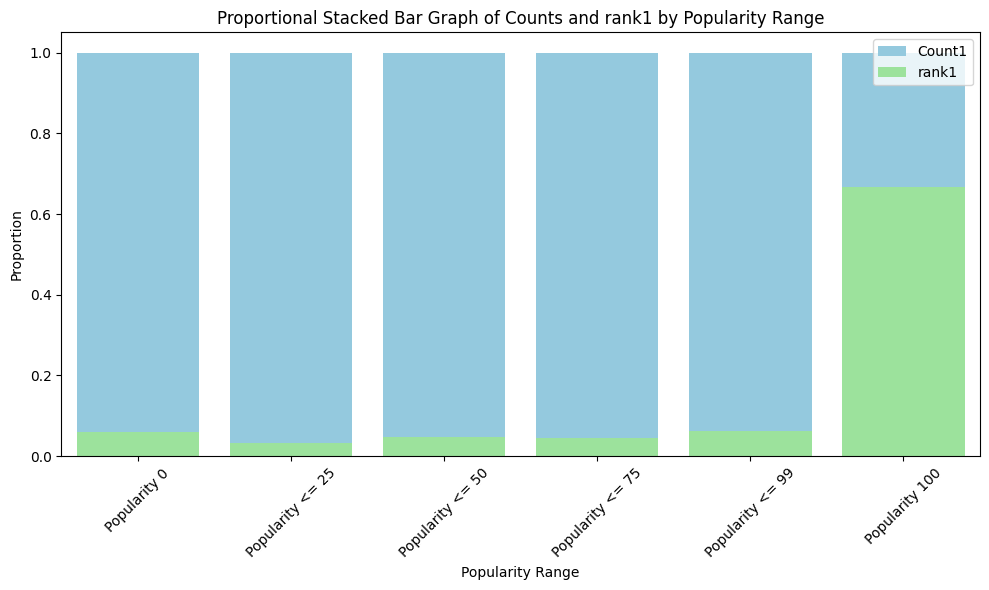

In [28]:
new_pop_df = new_pop.copy()

new_pop_df['count1'] = new_pop_df['Count'] / new_pop_df['Count']

# bar graph
plt.figure(figsize=(10, 6))

sns.barplot(x='Popularity Range', y='count1', data=new_pop_df, label='Count1', color='skyblue')
sns.barplot(x='Popularity Range', y='pct', data=new_pop_df, label='rank1', color='lightgreen')

plt.xlabel('Popularity Range')
plt.ylabel('Proportion')
plt.title('Proportional Stacked Bar Graph of Counts and rank1 by Popularity Range')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

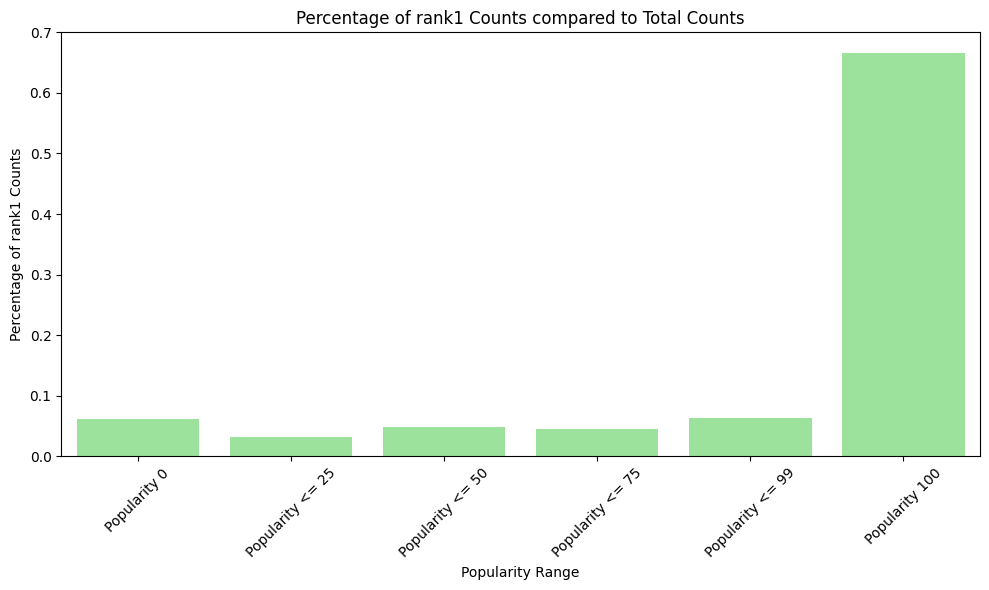

In [29]:
# counts의 값과 rank1의 비율
plt.figure(figsize=(10, 6))

sns.barplot(x='Popularity Range', y='pct', data=new_pop_df, color='lightgreen')

plt.xlabel('Popularity Range')
plt.ylabel('Percentage of rank1 Counts')
plt.title('Percentage of rank1 Counts compared to Total Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
new_pop

,Popularity Range,Count,rank1,pct
0,Popularity 0,510,31,0.060784
1,Popularity <= 25,739,24,0.032476
2,Popularity <= 50,2229,106,0.047555
3,Popularity <= 75,3603,161,0.044685
4,Popularity <= 99,1389,88,0.063355
5,Popularity 100,3,2,0.666667


- popularity=100임에도 1위를 못한 곡은 어떻게 되었을까?

In [31]:
popn1 = data[data['popularity']==100]
popw1 = data[(data['popularity']==100) & (data['daily_rank']==1)].sort_values('daily_rank')
unique_names = popn1['name'].unique()
unique_names1 = popw1['name'].unique()
print(f"popularity100: {unique_names}")
print(f"pop100 & rank1: {unique_names1}")

popularity100: ['greedy' 'All I Want for Christmas Is You' 'Cruel Summer']
pop100 & rank1: ['greedy' 'All I Want for Christmas Is You']


- 정보가 수집된 기간 중 popularity 100을 찍은 곡은 딱 3곡 뿐.
    - All I want for christmas is you
    - greedy
    - cruel summer
- 그 중에서 1위를 못한 곡
    - cruel summer
        - Taylor Swift의 콘서트 투어 + 틱톡에서 큰인기를 얻어 23년 초중반에 1위를 찍었지만 최근에는 다시 순위가 내려온 경우

In [32]:
g_min_date = data[(data['name'] == 'greedy') & (data['daily_rank'] == 1)]['snapshot_date'].min()
g_max_date = data[(data['name'] == 'greedy') & (data['daily_rank'] == 1)]['snapshot_date'].max()

a_min_date = data[(data['name'] == 'All I Want for Christmas Is You') & (data['daily_rank'] == 1)]['snapshot_date'].min()
a_max_date = data[(data['name'] == 'All I Want for Christmas Is You') & (data['daily_rank'] == 1)]['snapshot_date'].max()


c_min_date = data[(data['name'] == 'Cruel Summer') & (data['daily_rank'] == 1)]['snapshot_date'].min()
c_max_date = data[(data['name'] == 'Cruel Summer') & (data['daily_rank'] == 1)]['snapshot_date'].max()

print(f"greedy: {g_min_date} & {g_max_date}")
print(f"All I want...: {a_min_date} & {a_max_date}")
print(f"Cruel Summer: {c_min_date} & {c_max_date}")

greedy: 2023-10-18 & 2024-01-16
All I want...: 2023-11-27 & 2023-12-28
Cruel Summer: nan & nan


In [33]:
data[data['name']=='Cruel Summer'].sort_values('daily_rank')

,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
274222,Cruel Summer,Taylor Swift,2,1,0,PH,2023-11-02,100,False,178426,...,9,-5.707,1,0.157,0.117,0.000021,0.105,0.564,169.994,4
72884,Cruel Summer,Taylor Swift,2,22,3,AE,2023-12-28,97,False,178426,...,9,-5.707,1,0.157,0.117,0.000021,0.105,0.564,169.994,4
321693,Cruel Summer,Taylor Swift,2,1,48,PH,2023-10-20,99,False,178426,...,9,-5.707,1,0.157,0.117,0.000021,0.105,0.564,169.994,4
149534,Cruel Summer,Taylor Swift,2,1,2,AE,2023-12-07,99,False,178426,...,9,-5.707,1,0.157,0.117,0.000021,0.105,0.564,169.994,4
145884,Cruel Summer,Taylor Swift,2,0,1,AE,2023-12-08,99,False,178426,...,9,-5.707,1,0.157,0.117,0.000021,0.105,0.564,169.994,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141782,Cruel Summer,Taylor Swift,50,0,-10,CH,2023-12-09,99,False,178426,...,9,-5.707,1,0.157,0.117,0.000021,0.105,0.564,169.994,4
11540,Cruel Summer,Taylor Swift,50,0,-9,SK,2024-01-13,99,False,178426,...,9,-5.707,1,0.157,0.117,0.000021,0.105,0.564,169.994,4
304292,Cruel Summer,Taylor Swift,50,0,-1,KR,2023-10-25,100,False,178426,...,9,-5.707,1,0.157,0.117,0.000021,0.105,0.564,169.994,4
30423,Cruel Summer,Taylor Swift,50,0,-23,NO,2024-01-08,98,False,178426,...,9,-5.707,1,0.157,0.117,0.000021,0.105,0.564,169.994,4


- Cruel Summer의 최고 순위는 아쉽지만 greedy와 All I want for christmas is you에 밀려 2위
- greedy와 All I want for christmas is you에 밀린 것으로...
- 없었으면 1위는...

## 1.결론
- popularity가 높으면 높을수록 1위를 찍을 확률이 올라간다기보다는, popularity=100일 때 1위를 찍을 확률이 비약하게 높아진다.
- popularity=0이어도 1위를 차지하는 게 가능하다. 
    - 애초에 popularity=0으로 차트인을 해냈다.
    - 새로운 팬 유입은 어렵지만 이미 매니아 팬층을 확보한 가수들이라고 볼 수 있음

## 2. popularity가 0인 곡들의 특징

In [34]:
# popularity=0인 곡들로만 이루어진 데이터셋 새로 생성
df_pop0 = data[data['popularity']==0]
df_pop0

,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
4060,bu gece karakolluk olabilirim,Mert Ali Aslan,20,-1,30,TR,2024-01-15,0,True,175509,...,9,-10.706,0,0.0669,0.42100,0.000000,0.3280,0.680,142.127,4
5542,Top Top,"Jerome Whitaker, Dre Butterz, Lex",2,48,48,IS,2024-01-15,0,True,139337,...,1,-7.623,1,0.1280,0.04050,0.000000,0.1050,0.419,75.002,4
7291,"yes, and?",Ariana Grande,1,49,49,unknown,2024-01-14,0,True,214994,...,1,-6.513,1,0.0505,0.19800,0.000085,0.1040,0.823,119.008,4
7297,née-nah,"21 Savage, Travis Scott, Metro Boomin",7,43,43,unknown,2024-01-14,0,True,220584,...,1,-6.524,1,0.2270,0.00495,0.000000,0.5700,0.318,165.423,4
7299,redrum,21 Savage,9,41,41,unknown,2024-01-14,0,True,270697,...,2,-8.445,1,0.0481,0.00529,0.000224,0.5000,0.246,172.089,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328925,Tu hai kahan,AUR,1,49,0,PK,2023-10-18,0,False,263184,...,1,-9.738,1,0.0750,0.43700,0.000065,0.1120,0.569,83.679,4
329370,Jaga Jaga,"VicK, Babi",46,4,0,NG,2023-10-18,0,False,226644,...,1,-8.178,0,0.1680,0.55400,0.288000,0.0821,0.507,102.932,4
329918,Tu hai kahan,AUR,3,47,0,IN,2023-10-18,0,False,263184,...,1,-9.738,1,0.0750,0.43700,0.000065,0.1120,0.569,83.679,4
331575,Rockstar,Jay Chang,10,40,0,AE,2023-10-18,0,False,192173,...,6,-1.429,1,0.0942,0.20200,0.000000,0.1950,0.730,108.110,4


In [44]:
# display.max_rows = 25

In [45]:
df_pop0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2030 entries, 4060 to 331576
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                2030 non-null   object        
 1   artists             2030 non-null   object        
 2   daily_rank          2030 non-null   int64         
 3   daily_movement      2030 non-null   int64         
 4   weekly_movement     2030 non-null   int64         
 5   country             2030 non-null   object        
 6   snapshot_date       2030 non-null   object        
 7   popularity          2030 non-null   int64         
 8   is_explicit         2030 non-null   bool          
 9   duration_ms         2030 non-null   int64         
 10  album_name          2030 non-null   object        
 11  album_release_date  2030 non-null   object        
 12  danceability        2030 non-null   float64       
 13  energy              2030 non-null   float64     

<Axes: xlabel='daily_movement', ylabel='Count'>

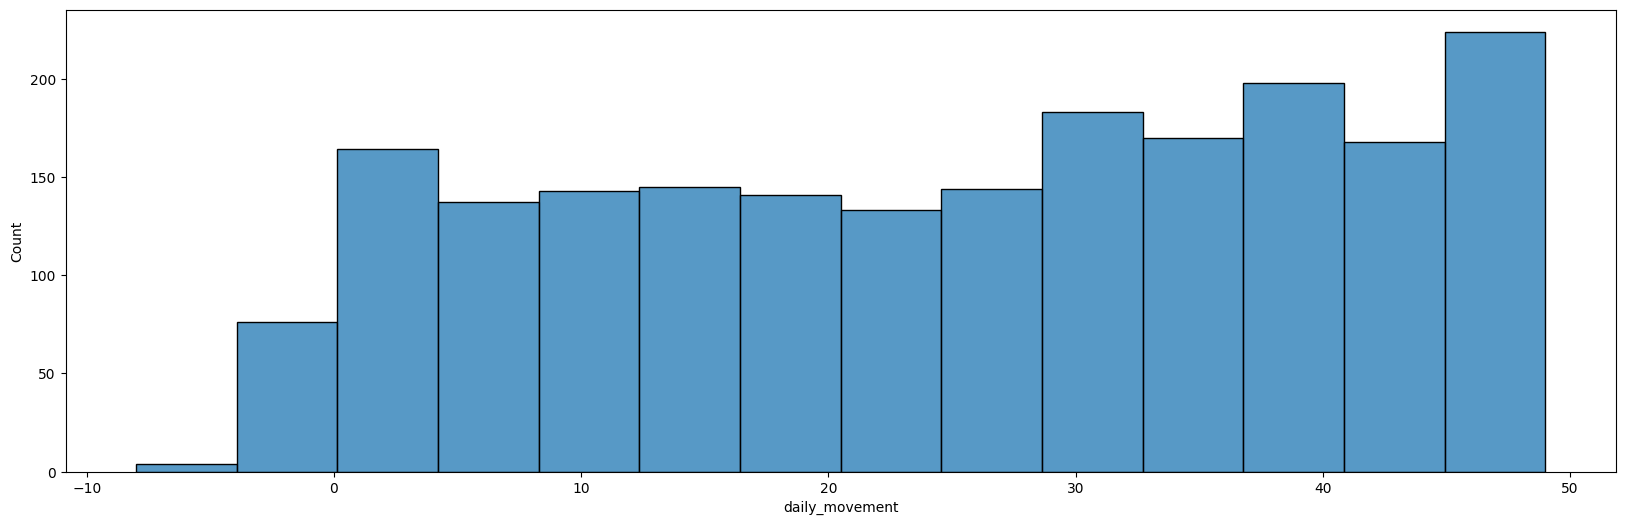

In [36]:
plt.figure(figsize=(20, 6))
sns.histplot(df_pop0,x='daily_movement')

<Axes: xlabel='weekly_movement', ylabel='Count'>

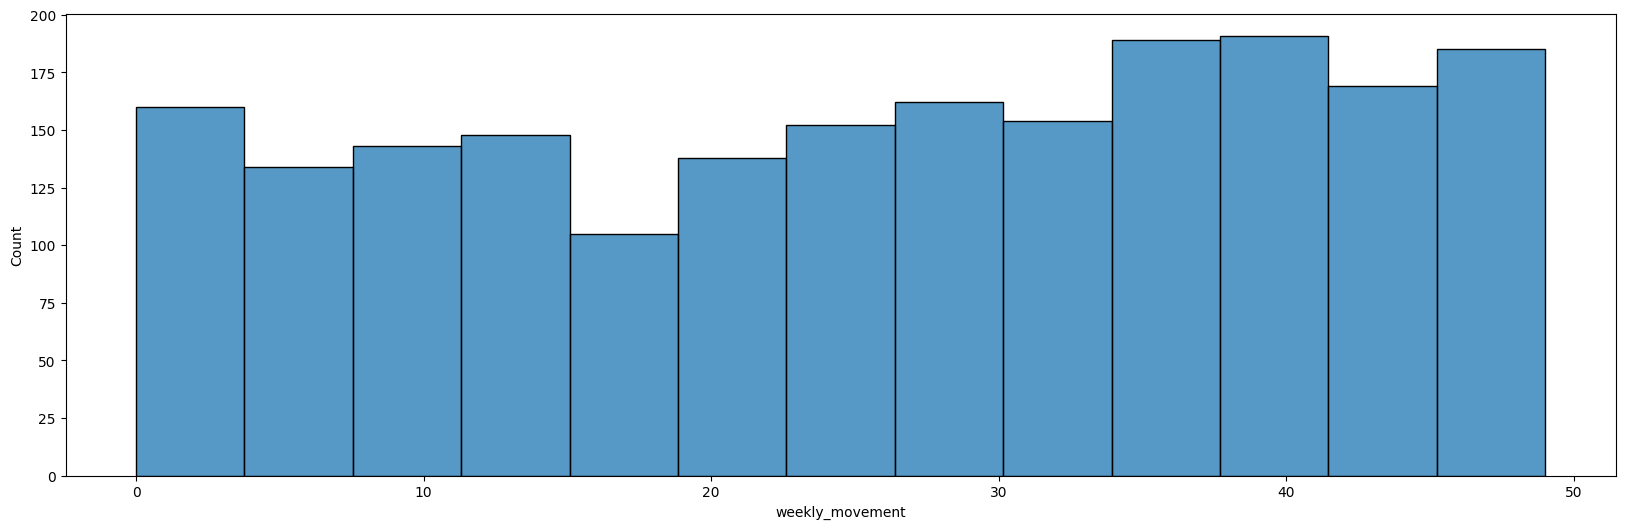

In [37]:
plt.figure(figsize=(20, 6))
sns.histplot(df_pop0,x='weekly_movement')

In [46]:
#출시일과 순위기록일간의 차 계산

# 날짜 열을 datetime 형식으로 변환
df_pop0['startdate'] = pd.to_datetime(df_pop0['snapshot_date'])
df_pop0['enddate'] = pd.to_datetime(df_pop0['album_release_date'])

# 두 날짜 열의 차이를 계산하여 새로운 열 생성
df_pop0['diff'] = df_pop0['startdate'] - df_pop0['enddate']
df_pop0 = df_pop0.drop(columns=['startdate','enddate'])
df_pop0['diff'] = df_pop0['diff'] / np.timedelta64(1, 'D') #timedelta형태의 데이터를 실수로 변환

df_pop0

C:\Users\User\AppData\Local\Temp\ipykernel_54152\3040133065.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop0['startdate'] = pd.to_datetime(df_pop0['snapshot_date'])
C:\Users\User\AppData\Local\Temp\ipykernel_54152\3040133065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop0['enddate'] = pd.to_datetime(df_pop0['album_release_date'])
C:\Users\User\AppData\Local\Temp\ipykernel_54152\3040133065.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,diff
4060,bu gece karakolluk olabilirim,Mert Ali Aslan,20,-1,30,TR,2024-01-15,0,True,175509,...,-10.706,0,0.0669,0.42100,0.000000,0.3280,0.680,142.127,4,4.0
5542,Top Top,"Jerome Whitaker, Dre Butterz, Lex",2,48,48,IS,2024-01-15,0,True,139337,...,-7.623,1,0.1280,0.04050,0.000000,0.1050,0.419,75.002,4,281.0
7291,"yes, and?",Ariana Grande,1,49,49,unknown,2024-01-14,0,True,214994,...,-6.513,1,0.0505,0.19800,0.000085,0.1040,0.823,119.008,4,2.0
7297,née-nah,"21 Savage, Travis Scott, Metro Boomin",7,43,43,unknown,2024-01-14,0,True,220584,...,-6.524,1,0.2270,0.00495,0.000000,0.5700,0.318,165.423,4,2.0
7299,redrum,21 Savage,9,41,41,unknown,2024-01-14,0,True,270697,...,-8.445,1,0.0481,0.00529,0.000224,0.5000,0.246,172.089,4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328925,Tu hai kahan,AUR,1,49,0,PK,2023-10-18,0,False,263184,...,-9.738,1,0.0750,0.43700,0.000065,0.1120,0.569,83.679,4,2.0
329370,Jaga Jaga,"VicK, Babi",46,4,0,NG,2023-10-18,0,False,226644,...,-8.178,0,0.1680,0.55400,0.288000,0.0821,0.507,102.932,4,14.0
329918,Tu hai kahan,AUR,3,47,0,IN,2023-10-18,0,False,263184,...,-9.738,1,0.0750,0.43700,0.000065,0.1120,0.569,83.679,4,2.0
331575,Rockstar,Jay Chang,10,40,0,AE,2023-10-18,0,False,192173,...,-1.429,1,0.0942,0.20200,0.000000,0.1950,0.730,108.110,4,1.0


In [47]:
df_pop0['diff'].value_counts()

diff
2.0       1056
3.0        826
1.0         33
9.0          9
691.0        9
          ... 
9160.0       1
281.0        1
365.0        1
659.0        1
15.0         1
Name: count, Length: 74, dtype: int64

- diff: 출시일과 순위기록일간의 차이
- popularity=0인 곡들은 순위변동이 심하거나 최근에 출시한 특징을 가지는 것을 확인할 수 있다.

## 3. 나라간 순위 변동은 비슷한가?
- 일본이랑 한국의 차트가 비슷할까?

### 전처리 하면서 알게 된 사실
- spotify 데이터셋들에 대해 찾던 중 API를 사용할 때 country ISO 코드 맞는 게 없어 null 값을 반환하는데
- spotify 차트에 나라말고, 'Global'이라는 항목이 따로 있기 때문이다.
- country 값이 비어있는 값이 다른 나라들의 값과 거의 비슷해 동일한 상황이라 판단
- 빈 값들은 global로 채워준다.

In [15]:
new_df = df.copy()

new_df['country'].fillna('Global', inplace=True)
new_df.dropna(subset=['name', 'artists'], inplace=True)
new_df

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7gaA3wERFkFkgivjwbSvkG,"yes, and?",Ariana Grande,1,0,49,Global,2024-01-16,89,True,...,1,-6.513,1,0.0505,0.1980,0.000085,0.104,0.823,119.008,4
1,0R6NfOiLzLj4O5VbYSJAjf,La Diabla,Xavi,2,0,-1,Global,2024-01-16,97,False,...,11,-4.372,0,0.0409,0.2550,0.000000,0.236,0.697,131.842,3
2,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,3,0,-1,Global,2024-01-16,100,True,...,6,-3.180,0,0.0319,0.2560,0.000000,0.114,0.844,111.018,1
3,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,Mitski,4,3,1,Global,2024-01-16,98,False,...,9,-14.958,1,0.0321,0.8680,0.135000,0.158,0.121,113.950,4
4,7CyPwkp0oE8Ro9Dd5CUDjW,"One Of The Girls (with JENNIE, Lily Rose Depp)","The Weeknd, JENNIE, Lily-Rose Depp",5,1,1,Global,2024-01-16,97,False,...,8,-6.287,1,0.0318,0.0545,0.000000,0.162,0.202,87.510,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331611,0AYt6NMyyLd0rLuvr0UkMH,Slime You Out (feat. SZA),"Drake, SZA",46,4,0,AE,2023-10-18,84,True,...,5,-9.243,0,0.0502,0.5080,0.000000,0.259,0.105,88.880,3
331612,2Gk6fi0dqt91NKvlzGsmm7,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47,3,0,AE,2023-10-18,80,True,...,10,-5.060,1,0.0452,0.0585,0.000000,0.132,0.476,121.879,4
331613,26b3oVLrRUaaybJulow9kz,People,Libianca,48,2,0,AE,2023-10-18,88,False,...,10,-7.621,0,0.0678,0.5510,0.000013,0.102,0.693,124.357,5
331614,5ydjxBSUIDn26MFzU3asP4,Rainy Days,V,49,1,0,AE,2023-10-18,88,False,...,9,-8.016,0,0.0875,0.7390,0.000000,0.148,0.282,74.828,4


In [12]:
# 음악 시장 상위 20개 나라 + Global
top20 = ['US', 'JP', 'GR', 'UK', 'FR', 'KR', 'CA', 'AU', 'CN', 'NL', 'IT', 'ES', 'SE', 'NO', 'DK', 'CH', 'MX', 'IN', 'AR', 'Global']

In [13]:
for country in top20:
    if country not in new_df['country'].values:
        print(f"'{country}' is not found in the 'country' column.")

'UK' is not found in the 'country' column.
'CN' is not found in the 'country' column.


In [16]:
new_df.isnull().sum()

spotify_id              0
name                    0
artists                 0
daily_rank              0
daily_movement          0
weekly_movement         0
country                 0
snapshot_date           0
popularity              0
is_explicit             0
duration_ms             0
album_name            164
album_release_date    164
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
dtype: int64

In [17]:
# 음악 시장 상위 20개 나라만 남기고 제거
df_filtered = new_df[new_df['country'].isin(top20)]
df_filtered

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7gaA3wERFkFkgivjwbSvkG,"yes, and?",Ariana Grande,1,0,49,Global,2024-01-16,89,True,...,1,-6.513,1,0.0505,0.1980,0.000085,0.104,0.823,119.008,4
1,0R6NfOiLzLj4O5VbYSJAjf,La Diabla,Xavi,2,0,-1,Global,2024-01-16,97,False,...,11,-4.372,0,0.0409,0.2550,0.000000,0.236,0.697,131.842,3
2,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,3,0,-1,Global,2024-01-16,100,True,...,6,-3.180,0,0.0319,0.2560,0.000000,0.114,0.844,111.018,1
3,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,Mitski,4,3,1,Global,2024-01-16,98,False,...,9,-14.958,1,0.0321,0.8680,0.135000,0.158,0.121,113.950,4
4,7CyPwkp0oE8Ro9Dd5CUDjW,"One Of The Girls (with JENNIE, Lily Rose Depp)","The Weeknd, JENNIE, Lily-Rose Depp",5,1,1,Global,2024-01-16,97,False,...,8,-6.287,1,0.0318,0.0545,0.000000,0.162,0.202,87.510,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331561,3WndNMJo029mMO64l9hGFm,Dale Mecha,Mesita,46,4,0,AR,2023-10-18,78,False,...,4,-4.360,0,0.4310,0.3000,0.000000,0.106,0.441,146.286,3
331562,6abr2lKyMZTy21gSPWm7aG,Entre Beso y Beso,Ke Personajes,47,3,0,AR,2023-10-18,76,False,...,10,-1.669,0,0.0536,0.5700,0.000000,0.206,0.906,85.962,4
331563,7BVMtLpd7edHeOizt4RWz9,Frágil,"Yahritza Y Su Esencia, Grupo Frontera",48,2,0,AR,2023-10-18,78,False,...,6,-4.515,1,0.0309,0.3650,0.000000,0.112,0.393,149.918,4
331564,4qSEvFGCpde73gqIuq3sho,HIBIKI,"Bad Bunny, Mora",49,1,0,AR,2023-10-18,88,True,...,6,-5.605,0,0.0706,0.6040,0.000000,0.118,0.528,119.935,4


In [18]:
top20 = ['US', 'JP', 'GR', 'UK', 'FR', 'KR', 'CA', 'AU', 'CN', 'NL', 'IT', 'ES', 'SE', 'NO', 'DK', 'CH', 'MX', 'IN', 'AR', 'Global']

# Count the number of unique countries in the DataFrame's 'country' column
num_countries_in_df = len(df_filtered['country'].unique())

# Print the total number of countries in 'top20' and the DataFrame
print(f"Total countries in 'top20': {len(top20)}")
print(f"Number of countries in the DataFrame: {num_countries_in_df}")

# Check for countries in 'top20' that are not in the DataFrame's 'country' column
for country in top20:
    if country not in df_filtered['country'].values:
        print(f"'{country}' is not found in the 'country' column.")

Total countries in 'top20': 20
Number of countries in the DataFrame: 18
'UK' is not found in the 'country' column.
'CN' is not found in the 'country' column.


In [19]:
df_filtered.info()
# 나라별 eda 할 때 쓸만한 컬럼값만 뽑기, 곡의 metadata는 궁금하지 않으니 빼자.
column_l = ['name', 'artists', 'daily_rank', 'daily_movement', 'weekly_movement', 'country', 'snapshot_date', 'popularity']

<class 'pandas.core.frame.DataFrame'>
Index: 81829 entries, 0 to 331565
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spotify_id          81829 non-null  object 
 1   name                81829 non-null  object 
 2   artists             81829 non-null  object 
 3   daily_rank          81829 non-null  int64  
 4   daily_movement      81829 non-null  int64  
 5   weekly_movement     81829 non-null  int64  
 6   country             81829 non-null  object 
 7   snapshot_date       81829 non-null  object 
 8   popularity          81829 non-null  int64  
 9   is_explicit         81829 non-null  bool   
 10  duration_ms         81829 non-null  int64  
 11  album_name          81749 non-null  object 
 12  album_release_date  81749 non-null  object 
 13  danceability        81829 non-null  float64
 14  energy              81829 non-null  float64
 15  key                 81829 non-null  int64  
 16  loudness

In [20]:
new_df = df_filtered[column_l].copy()
new_df

,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity
0,"yes, and?",Ariana Grande,1,0,49,Global,2024-01-16,89
1,La Diabla,Xavi,2,0,-1,Global,2024-01-16,97
2,greedy,Tate McRae,3,0,-1,Global,2024-01-16,100
3,My Love Mine All Mine,Mitski,4,3,1,Global,2024-01-16,98
4,"One Of The Girls (with JENNIE, Lily Rose Depp)","The Weeknd, JENNIE, Lily-Rose Depp",5,1,1,Global,2024-01-16,97
...,...,...,...,...,...,...,...,...
331561,Dale Mecha,Mesita,46,4,0,AR,2023-10-18,78
331562,Entre Beso y Beso,Ke Personajes,47,3,0,AR,2023-10-18,76
331563,Frágil,"Yahritza Y Su Esencia, Grupo Frontera",48,2,0,AR,2023-10-18,78
331564,HIBIKI,"Bad Bunny, Mora",49,1,0,AR,2023-10-18,88


In [21]:
new_df.isnull().sum()

name               0
artists            0
daily_rank         0
daily_movement     0
weekly_movement    0
country            0
snapshot_date      0
popularity         0
dtype: int64

popularity eda 하면서 찾은 1위 곡 정보 살펴보기

In [22]:
new_df[new_df['name'] == 'greedy']

,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity
2,greedy,Tate McRae,3,0,-1,Global,2024-01-16,100
258,greedy,Tate McRae,9,0,-4,US,2024-01-16,100
672,greedy,Tate McRae,23,0,1,SE,2024-01-16,100
1204,greedy,Tate McRae,5,1,1,NO,2024-01-16,100
1252,greedy,Tate McRae,3,1,-1,NL,2024-01-16,100
...,...,...,...,...,...,...,...,...
330426,greedy,Tate McRae,11,39,0,FR,2023-10-18,98
330769,greedy,Tate McRae,4,46,0,DK,2023-10-18,98
331068,greedy,Tate McRae,3,47,0,CH,2023-10-18,98
331119,greedy,Tate McRae,4,46,0,CA,2023-10-18,98


- 10월 18일부터 1월 16일까지 높은 순위를 기록하고 있는 것으로 보임
    - 일단 지금 봤을 때 제일 낮은 순위가 23위

In [23]:
new_df[(new_df['name'] == 'greedy') & (new_df['snapshot_date'] == '2023-10-18')]

,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity
327980,greedy,Tate McRae,6,44,0,Global,2023-10-18,98
328235,greedy,Tate McRae,11,39,0,US,2023-10-18,98
328636,greedy,Tate McRae,12,38,0,SE,2023-10-18,98
329176,greedy,Tate McRae,2,48,0,NO,2023-10-18,98
329228,greedy,Tate McRae,4,46,0,NL,2023-10-18,98
330344,greedy,Tate McRae,29,21,0,GR,2023-10-18,98
330426,greedy,Tate McRae,11,39,0,FR,2023-10-18,98
330769,greedy,Tate McRae,4,46,0,DK,2023-10-18,98
331068,greedy,Tate McRae,3,47,0,CH,2023-10-18,98
331119,greedy,Tate McRae,4,46,0,CA,2023-10-18,98


In [26]:
import matplotlib.pyplot as plt

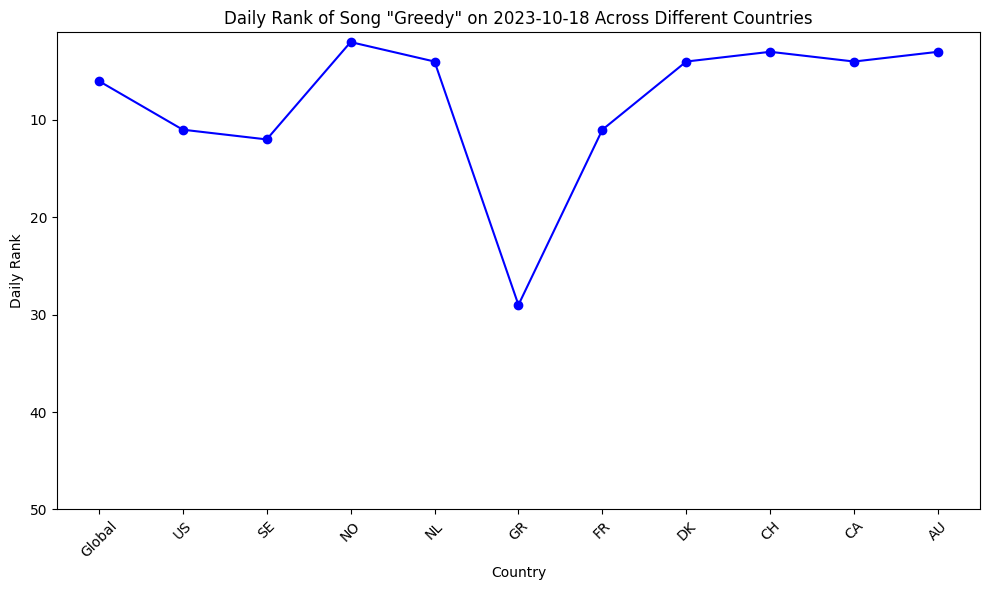

In [27]:
# line chart

filtered_data = new_df[(new_df['name'] == 'greedy') & (new_df['snapshot_date'] == '2023-10-18')]

plt.figure(figsize=(10, 6))

plt.plot(filtered_data['country'], filtered_data['daily_rank'], marker='o', linestyle='-', color='b')

plt.xlabel('Country')
plt.ylabel('Daily Rank')
plt.title('Daily Rank of Song "Greedy" on 2023-10-18 Across Different Countries')
plt.ylim(50, 1) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
most_common_date = new_df[new_df['daily_rank'] == 1]['snapshot_date'].value_counts().idxmax()
most_common_date

'2023-11-20'

In [30]:
new_df[(new_df['name'] == 'greedy') & (new_df['snapshot_date'] == '2023-11-20')]


,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity
207944,greedy,Tate McRae,1,49,0,Global,2023-11-20,100
208214,greedy,Tate McRae,4,46,7,US,2023-11-20,100
208651,greedy,Tate McRae,17,-2,-1,SE,2023-11-20,100
209219,greedy,Tate McRae,7,-3,-4,NO,2023-11-20,100
209268,greedy,Tate McRae,3,0,0,NL,2023-11-20,100
210545,greedy,Tate McRae,7,0,1,FR,2023-11-20,100
210917,greedy,Tate McRae,7,-3,-3,DK,2023-11-20,100
211224,greedy,Tate McRae,2,0,0,CH,2023-11-20,100
211280,greedy,Tate McRae,2,48,-1,CA,2023-11-20,100
211598,greedy,Tate McRae,2,0,-1,AU,2023-11-20,100


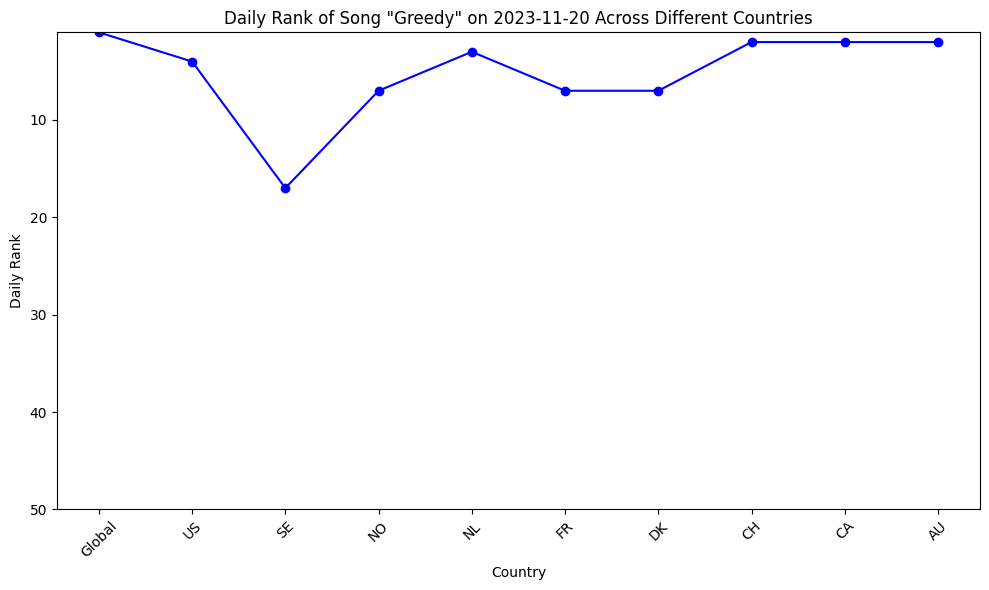

In [31]:
filtered_data = new_df[(new_df['name'] == 'greedy') & (new_df['snapshot_date'] == '2023-11-20')]

plt.figure(figsize=(10, 6))

plt.plot(filtered_data['country'], filtered_data['daily_rank'], marker='o', linestyle='-', color='b')

plt.xlabel('Country')
plt.ylabel('Daily Rank')
plt.title('Daily Rank of Song "Greedy" on 2023-11-20 Across Different Countries')
plt.ylim(50, 1) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## NetworkX 연습
#### 순서

1. 노래와 국가에 대해 bipartite network(이분법 네트워크) 구축
2. unipartite projection은 상위 50위 차트에 나열된 국가 간의 공통된 노래 수를 나타냄
3. 노래의 순위에 따라 가중치 부여
4. 지리적으로 가까운 국가들 사이의 노래 선호도 여부 파악

### 추가적인 데이터 정리
- 곡 제목, 가수, 나라가 데이터셋에 있어야 함
    - 만약 해당 나라 차트에 들어가있으면 1, 아니면 0 부여
    - ex. greedy, US, 1
- 노래의 순위도 중요한 정보
    - 가중치를 매기기 위해 50을 곱한 다음 순위로 나눈다(상위 50곡이기 때문에 50으로 나눔)
    - 따라서 순위가 높을수록(1에 가까운 낮은 수일수록) 가중치는 높아진다(더 인기 많은 곡)

In [32]:
data = pd.DataFrame(columns=['name', 'artists', 'WeightedOne', 'Country', 'Date'])
data

,name,artists,WeightedOne,Country,Date


In [33]:
# df 담을 list
data_l = [] 

for date in new_df['snapshot_date'].unique().tolist():
    for country in new_df['country'].unique().tolist():
        firstdf = new_df[(new_df['country']==country) & (new_df['snapshot_date']==date)]
        firstdf["One"]=1
        firstdf["WeightedOne"] = (firstdf["One"]*50) / firstdf["daily_rank"]
        seconddf = firstdf[["name", "artists", "WeightedOne"]].groupby(by=["name", 'artists']).sum().reset_index().sort_values(by=["WeightedOne"], ascending=False)[:50]
        seconddf["Country"] = country
        seconddf['Date'] = date

        data_l.append(seconddf)

# data_l로 새로운 데이터 생성
data = pd.concat(data_l, ignore_index=True)
data

C:\Users\User\AppData\Local\Temp\ipykernel_98152\2141969001.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstdf["One"]=1
C:\Users\User\AppData\Local\Temp\ipykernel_98152\2141969001.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstdf["WeightedOne"] = (firstdf["One"]*50) / firstdf["daily_rank"]
C:\Users\User\AppData\Local\Temp\ipykernel_98152\2141969001.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,name,artists,WeightedOne,Country,Date
0,"yes, and?",Ariana Grande,50.000000,Global,2024-01-16
1,La Diabla,Xavi,25.000000,Global,2024-01-16
2,greedy,Tate McRae,16.666667,Global,2024-01-16
3,My Love Mine All Mine,Mitski,12.500000,Global,2024-01-16
4,"One Of The Girls (with JENNIE, Lily Rose Depp)","The Weeknd, JENNIE, Lily-Rose Depp",10.000000,Global,2024-01-16
...,...,...,...,...,...
81736,Dale Mecha,Mesita,1.086957,AR,2023-10-18
81737,Entre Beso y Beso,Ke Personajes,1.063830,AR,2023-10-18
81738,Frágil,"Yahritza Y Su Esencia, Grupo Frontera",1.041667,AR,2023-10-18
81739,HIBIKI,"Bad Bunny, Mora",1.020408,AR,2023-10-18


- WeightedOne = 50 -> 1위
- WeightedOne = 1  -> 50위

In [35]:
import numpy as np

In [36]:
data["Sum"] = np.sum(data.WeightedOne)
data["NormalizedWeight"] = data['WeightedOne']/data["Sum"]  # 정규화
data["WeightedOne2"] = data["NormalizedWeight"] * 100  # 100 곱해 퍼센티지 표현

data

,name,artists,WeightedOne,Country,Date,Sum,NormalizedWeight,WeightedOne2
0,"yes, and?",Ariana Grande,50.000000,Global,2024-01-16,368193.358145,0.000136,0.013580
1,La Diabla,Xavi,25.000000,Global,2024-01-16,368193.358145,0.000068,0.006790
2,greedy,Tate McRae,16.666667,Global,2024-01-16,368193.358145,0.000045,0.004527
3,My Love Mine All Mine,Mitski,12.500000,Global,2024-01-16,368193.358145,0.000034,0.003395
4,"One Of The Girls (with JENNIE, Lily Rose Depp)","The Weeknd, JENNIE, Lily-Rose Depp",10.000000,Global,2024-01-16,368193.358145,0.000027,0.002716
...,...,...,...,...,...,...,...,...
81736,Dale Mecha,Mesita,1.086957,AR,2023-10-18,368193.358145,0.000003,0.000295
81737,Entre Beso y Beso,Ke Personajes,1.063830,AR,2023-10-18,368193.358145,0.000003,0.000289
81738,Frágil,"Yahritza Y Su Esencia, Grupo Frontera",1.041667,AR,2023-10-18,368193.358145,0.000003,0.000283
81739,HIBIKI,"Bad Bunny, Mora",1.020408,AR,2023-10-18,368193.358145,0.000003,0.000277


In [37]:
sub_data = data[['name', 'Country', 'WeightedOne2']]
sub_data

,name,Country,WeightedOne2
0,"yes, and?",Global,0.013580
1,La Diabla,Global,0.006790
2,greedy,Global,0.004527
3,My Love Mine All Mine,Global,0.003395
4,"One Of The Girls (with JENNIE, Lily Rose Depp)",Global,0.002716
...,...,...,...
81736,Dale Mecha,AR,0.000295
81737,Entre Beso y Beso,AR,0.000289
81738,Frágil,AR,0.000283
81739,HIBIKI,AR,0.000277


- Networkx 라이브러리는 
    1. 데이터가 숫자여야 한다
    2. 노드 이름은 dictionary 형태여야 한다

1. 노래와 국가를 number로 list에 매핑한다

In [38]:
nodenumber = pd.DataFrame(sub_data['name'].unique().tolist(), columns=['name'])
nodenumber

,name
0,"yes, and?"
1,La Diabla
2,greedy
3,My Love Mine All Mine
4,"One Of The Girls (with JENNIE, Lily Rose Depp)"
...,...
2024,NO ME QUIERO CASAR
2025,Tsiou
2026,Mexri Telous
2027,VOU 787


In [39]:
nodenumber['TrackNumber'] = nodenumber.index+1
nodenumber

,name,TrackNumber
0,"yes, and?",1
1,La Diabla,2
2,greedy,3
3,My Love Mine All Mine,4
4,"One Of The Girls (with JENNIE, Lily Rose Depp)",5
...,...,...
2024,NO ME QUIERO CASAR,2025
2025,Tsiou,2026
2026,Mexri Telous,2027
2027,VOU 787,2028


In [41]:
print(len(nodenumber["TrackNumber"]))
print(len(nodenumber2['Country']))

2029
18


In [40]:
nodenumber2 = pd.DataFrame(sub_data["Country"].unique().tolist(), columns=['Country'])
nodenumber2["CountryNumber"] = range(2030, 2030+18)

### 매핑된 숫자로 새로운 데이터셋 생성

In [42]:
sub_data

,name,Country,WeightedOne2
0,"yes, and?",Global,0.013580
1,La Diabla,Global,0.006790
2,greedy,Global,0.004527
3,My Love Mine All Mine,Global,0.003395
4,"One Of The Girls (with JENNIE, Lily Rose Depp)",Global,0.002716
...,...,...,...
81736,Dale Mecha,AR,0.000295
81737,Entre Beso y Beso,AR,0.000289
81738,Frágil,AR,0.000283
81739,HIBIKI,AR,0.000277


In [43]:
sub_data["Name2"] = 0
for i in range(len(sub_data)):
    sub_data.iloc[i, 3] = nodenumber[nodenumber.name==sub_data.name.values[i]]["TrackNumber"].values[0]

sub_data

C:\Users\User\AppData\Local\Temp\ipykernel_98152\4137713415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data["Name2"] = 0


,name,Country,WeightedOne2,Name2
0,"yes, and?",Global,0.013580,1
1,La Diabla,Global,0.006790,2
2,greedy,Global,0.004527,3
3,My Love Mine All Mine,Global,0.003395,4
4,"One Of The Girls (with JENNIE, Lily Rose Depp)",Global,0.002716,5
...,...,...,...,...
81736,Dale Mecha,AR,0.000295,1555
81737,Entre Beso y Beso,AR,0.000289,608
81738,Frágil,AR,0.000283,1822
81739,HIBIKI,AR,0.000277,1458


In [44]:
sub_data["Country2"] = 0
for i in range(len(sub_data)):
    sub_data.iloc[i, 4] = nodenumber2[nodenumber2.Country==sub_data.Country.values[i]]["CountryNumber"].values[0]

sub_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_98152\2279213518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data["Country2"] = 0


,name,Country,WeightedOne2,Name2,Country2
0,"yes, and?",Global,0.013580,1,2030
1,La Diabla,Global,0.006790,2,2030
2,greedy,Global,0.004527,3,2030
3,My Love Mine All Mine,Global,0.003395,4,2030
4,"One Of The Girls (with JENNIE, Lily Rose Depp)",Global,0.002716,5,2030


In [45]:
dataorig = sub_data[["Name2", "Country2", "WeightedOne2"]]
dataorig = dataorig.rename(columns={"WeightedOne2": "weight"})
dataorig

,Name2,Country2,weight
0,1,2030,0.013580
1,2,2030,0.006790
2,3,2030,0.004527
3,4,2030,0.003395
4,5,2030,0.002716
...,...,...,...
81736,1555,2047,0.000295
81737,608,2047,0.000289
81738,1822,2047,0.000283
81739,1458,2047,0.000277


- 어떤 노드가 노래이고 어떤 노드가 국가인지 구분
- 전에 사용했던 숫자 사용

In [47]:
nodetypes = pd.DataFrame(range(1, 2048), columns=['node'])
nodetypes["is_country"] = 0

for i in range(len(nodetypes)):
    if nodetypes.node[i] >= 2030:
        nodetypes["is_country"][i] = 1

nodetypes

,node,is_country
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2042,2043,1
2043,2044,1
2044,2045,1
2045,2046,1


- visualization 때 보일 노드 이름을 dictionary 형태로 생성

In [48]:
d = {}
for i in range(len(nodenumber2)):
    d[nodenumber2["CountryNumber"][i]] = nodenumber2["Country"][i]

d2 = {}
for i in range(len(nodenumber)):
    d2[nodenumber["TrackNumber"][i]] = nodenumber["name"][i]

In [49]:
d.items()

dict_items([(2030, 'Global'), (2031, 'US'), (2032, 'SE'), (2033, 'NO'), (2034, 'NL'), (2035, 'MX'), (2036, 'KR'), (2037, 'JP'), (2038, 'IT'), (2039, 'IN'), (2040, 'GR'), (2041, 'FR'), (2042, 'ES'), (2043, 'DK'), (2044, 'CH'), (2045, 'CA'), (2046, 'AU'), (2047, 'AR')])

## 네트워크 시각화

In [50]:
import networkx as nx

In [51]:
G_orig = nx.from_pandas_edgelist(dataorig, source='Country2', target='Name2', edge_attr=True, create_using=nx.Graph())
print(G_orig)
print("Is bipartite: ", nx.is_bipartite(G_orig))
print("Is connected: ", nx.is_connected(G_orig))
print("Is weighted: ", nx.is_weighted(G_orig))

Graph with 2047 nodes and 3378 edges
Is bipartite:  True
Is connected:  True
Is weighted:  True


In [52]:
print(G_orig)

Graph with 2047 nodes and 3378 edges


In [53]:
nodetype_dict = nodetypes.set_index('node').to_dict('index')
nodetype_dict

{1: {'is_country': 0},
 2: {'is_country': 0},
 3: {'is_country': 0},
 4: {'is_country': 0},
 5: {'is_country': 0},
 6: {'is_country': 0},
 7: {'is_country': 0},
 8: {'is_country': 0},
 9: {'is_country': 0},
 10: {'is_country': 0},
 11: {'is_country': 0},
 12: {'is_country': 0},
 13: {'is_country': 0},
 14: {'is_country': 0},
 15: {'is_country': 0},
 16: {'is_country': 0},
 17: {'is_country': 0},
 18: {'is_country': 0},
 19: {'is_country': 0},
 20: {'is_country': 0},
 21: {'is_country': 0},
 22: {'is_country': 0},
 23: {'is_country': 0},
 24: {'is_country': 0},
 25: {'is_country': 0},
 26: {'is_country': 0},
 27: {'is_country': 0},
 28: {'is_country': 0},
 29: {'is_country': 0},
 30: {'is_country': 0},
 31: {'is_country': 0},
 32: {'is_country': 0},
 33: {'is_country': 0},
 34: {'is_country': 0},
 35: {'is_country': 0},
 36: {'is_country': 0},
 37: {'is_country': 0},
 38: {'is_country': 0},
 39: {'is_country': 0},
 40: {'is_country': 0},
 41: {'is_country': 0},
 42: {'is_country': 0},
 

In [54]:
nx.set_node_attributes(G_orig, nodetype_dict)

In [55]:
countries = [x for x,y in G_orig.nodes(data=True) if y['is_country']==1]
tracks = [x for x,y in G_orig.nodes(data=True) if y['is_country']==0]

In [59]:
dgc = nx.degree_centrality(G_orig)
cls = nx.closeness_centrality(G_orig)
btw = nx.betweenness_centrality(G_orig,weight='weight')
cr = pd.DataFrame(index=G_orig.nodes())
cr['dgc'] = cr.index.map(dgc)
cr['cls'] = cr.index.map(cls)
cr['btw'] = cr.index.map(btw)
cr["name"]=""
for i in cr.index:
  if i>=2030:
    cr["name"][i]=d[i]
  else:
    cr["name"][i]=d2[i]

C:\Users\User\AppData\Local\Temp\ipykernel_98152\2169218675.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr["name"][i]=d[i]
C:\Users\User\AppData\Local\Temp\ipykernel_98152\2169218675.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr["name"][i]=d2[i]
C:\Users\User\AppData\Local\Temp\ipykernel_98152\2169218675.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr["name"][i]=d2[i]
C:\Users\User\AppData\Local\Temp\ipykerne

In [60]:
cr

,dgc,cls,btw,name
2030,0.104106,0.359263,0.058607,Global
1,0.007820,0.459569,0.004748,"yes, and?"
2,0.001466,0.276039,0.000000,La Diabla
3,0.005865,0.398986,0.000000,greedy
4,0.004399,0.334205,0.021826,My Love Mine All Mine
...,...,...,...,...
2025,0.000489,0.251661,0.000000,NO ME QUIERO CASAR
2026,0.000489,0.252780,0.000000,Tsiou
2027,0.000489,0.252780,0.000000,Mexri Telous
2028,0.000489,0.251661,0.000000,VOU 787


In [58]:
from networkx.algorithms import bipartite

In [61]:
country_net = bipartite.collaboration_weighted_projected_graph(G_orig, countries)
print(nx.info(country_net))
print("Is bipartite: ", nx.is_bipartite(country_net))
print("Is connected: ", nx.is_connected(country_net))
print("Is weighted: ", nx.is_weighted(country_net))
track_net = bipartite.collaboration_weighted_projected_graph(G_orig, tracks)
print(nx.info(track_net))
print("Is bipartite: ", nx.is_bipartite(track_net))
print("Is connected: ", nx.is_connected(track_net))
print("Is weighted: ", nx.is_weighted(track_net))

C:\Users\User\AppData\Local\Temp\ipykernel_98152\4243283379.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(country_net))


Graph with 18 nodes and 144 edges
Is bipartite:  False
Is connected:  True
Is weighted:  True
Graph with 2029 nodes and 270470 edges
Is bipartite:  False
Is connected:  True
Is weighted:  True


C:\Users\User\AppData\Local\Temp\ipykernel_98152\4243283379.py:7: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(track_net))


In [62]:
a=list(country_net.edges(data=True))
country1=[]
country2=[]
weight=[]
for i in range(len(a)):
  country1.append(a[i][0])
  country2.append(a[i][1])
  weight.append(a[i][2]['weight'])

In [63]:
similarcountries=pd.DataFrame({'country1':country1,'country2':country2,'weight':weight})
similarcountries["country1_name"]=""
for i in similarcountries.country1.values:
  idx=similarcountries[similarcountries.country1==i].index
  similarcountries.iloc[idx,3]=d[i]
similarcountries["country2_name"]=""
for i in similarcountries.country2.values:
  idx=similarcountries[similarcountries.country2==i].index
  similarcountries.iloc[idx,4]=d[i]

d:\ProgramFiles\anaconda3\envs\upstage\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


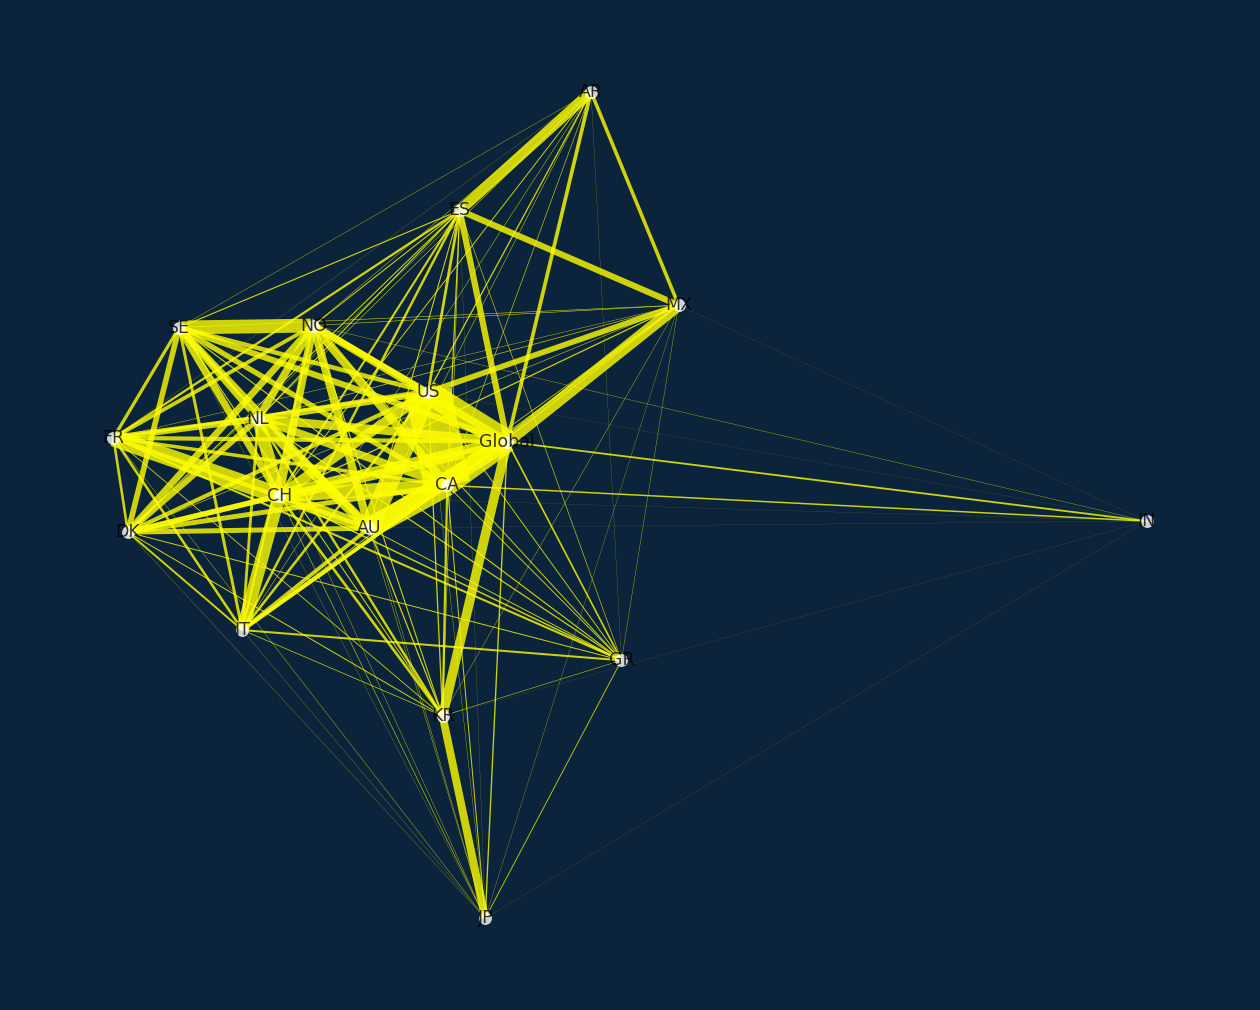

In [64]:
core_nodes = max(nx.connected_components(country_net), key=len)
core = country_net.subgraph(core_nodes)
nodes = core.nodes()
degree = core.degree()
colors = [degree[n] for n in nodes]
pos = nx.spring_layout(core,weight='weight')
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys
vmin = min(colors)
vmax = max(colors)
fig = plt.figure(figsize = (25,20), dpi=50)
nx.draw(core,alpha = 0.8, pos=pos,nodelist = nodes, node_color = 'w', with_labels= True,font_size = 25, width = [d["weight"] for (u, v, d) in core.edges(data=True)], cmap = cmap, edge_color ='yellow',labels=d)
fig.set_facecolor('#0B243B')
                            
plt.show()